In [1]:
import tensorflow as tf
import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
__author__ = "Olivares Castillo José Luis"

tf.__version__

'1.5.0-rc0'

In [2]:
es,na = utils.load_embeddings("n2v")

In [3]:
na_dummy = na.drop(na.columns[0], axis=1)
na_vectores1 = na_dummy.values.astype(np.float64)

In [4]:
eval_set = utils.get_lexicon("eval")

In [5]:
eval_set.head()

,esp,nah
0,traer,itqui
1,traer,huica
2,traer,huiqui
3,traer,cui
4,adornar,apana


In [6]:
#eval_seed[0].__len__(),eval_seed[1].__len__()

In [7]:
na[na[0]=="chicha"]

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128


In [8]:
eval_es = list(set(eval_set["esp"]))
#eval_es = list(set(eval_seed[2]))

In [9]:
eval_es_index = [int(es[es[0] == palabra].index[0])
                  for palabra in eval_es]

In [10]:
es[es[0] == "pluma"]

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
2902,pluma,-0.38696700000000001,0.0050260000000000001,-0.191887,-0.081058000000000005,-0.211675,-0.21754299999999999,-0.019026000000000001,0.45404600000000001,0.0063090000000000004,...,-0.013390000000000001,0.023695999999999998,0.39460200000000001,-0.0032209999999999999,-0.70866700000000005,0.021819000000000002,0.18177499999999999,0.43624200000000002,-0.162193,-0.076617000000000005


In [11]:
eval_es_index[0]

3143

In [12]:
eval_es_vectores = utils.get_vectors(es,eval_es_index)

In [13]:
eval_es_vectores.shape

(150, 128)

In [14]:
test_vectors = np.array([np.array(es.iloc[indice][1::]).astype(np.float64) for indice in eval_es_index])

In [15]:
sess = tf.Session()

In [16]:
#saver = tf.train.import_meta_graph('./models/model1111_gpu/model2250.ckpt.meta')
#saver.restore(sess,tf.train.latest_checkpoint('./models/model1111_gpu/'))
saver = tf.train.import_meta_graph('./models/model_joyce/modeljoyce.ckpt.meta')
saver.restore(sess, tf.train.latest_checkpoint('./models/model_joyce/'))

INFO:tensorflow:Restoring parameters from ./models/model_joyce/modeljoyce.ckpt


In [17]:
graph = tf.get_default_graph()

In [18]:
X = graph.get_tensor_by_name("input/input_es:0")
#y = graph.get_tensor_by_name("input/target_na:0")

In [19]:
[n.name for n in tf.get_default_graph().as_graph_def().node]

['input/input_es',
 'input/target_na',
 'dropout_prob',
 'Const',
 'W1/Initializer/random_uniform/shape',
 'W1/Initializer/random_uniform/min',
 'W1/Initializer/random_uniform/max',
 'W1/Initializer/random_uniform/RandomUniform',
 'W1/Initializer/random_uniform/sub',
 'W1/Initializer/random_uniform/mul',
 'W1/Initializer/random_uniform',
 'W1',
 'W1/IsInitialized/VarIsInitializedOp',
 'W1/Assign',
 'W1/Read/ReadVariableOp',
 'Read/ReadVariableOp',
 'Identity',
 'W1/Regularizer/l2_regularizer/scale',
 'W1/Regularizer/l2_regularizer/L2Loss/ReadVariableOp',
 'W1/Regularizer/l2_regularizer/L2Loss',
 'W1/Regularizer/l2_regularizer',
 'zeros',
 'b1',
 'b1/Assign',
 'b1/read',
 'xw_plus_b/ReadVariableOp',
 'xw_plus_b/MatMul',
 'xw_plus_b',
 'fc1',
 'dropout/Shape',
 'dropout/random_uniform/min',
 'dropout/random_uniform/max',
 'dropout/random_uniform/RandomUniform',
 'dropout/random_uniform/sub',
 'dropout/random_uniform/mul',
 'dropout/random_uniform',
 'dropout/add',
 'dropout/Floor',
 'dro

In [20]:
kprob = graph.get_tensor_by_name("dropout_prob:0")

In [22]:
#output_NN = graph.get_tensor_by_name("output/xw_plus_b:0")#model1937
output_NN = graph.get_tensor_by_name("xw_plus_b_1:0")
#output_NN = graph.get_tensor_by_name("nah_predicted:0")
#output_NN = graph.get_tensor_by_name("dense_2/BiasAdd:0")
#output_NN = graph.get_tensor_by_name("output_1:0")

In [23]:
for v in tf.trainable_variables():
        print(v.name)

W1:0
b1:0
W_na:0
b_na:0


In [24]:
from tensorflow.python import pywrap_tensorflow
    
model_file = "./models/model1111_gpu/model2250.ckpt"
reader = pywrap_tensorflow.NewCheckpointReader(model_file)
var_to_shape_map = reader.get_variable_to_shape_map()
    
for key in sorted(var_to_shape_map):
    print("tensor_name: ", key)
    #print(reader.get_tensor(key))
print(type(reader.get_tensor("b1")))

tensor_name:  W1
tensor_name:  W1/Adagrad
tensor_name:  W_na
tensor_name:  W_na/Adagrad
tensor_name:  b1
tensor_name:  b1/Adagrad
tensor_name:  b_na
tensor_name:  b_na/Adagrad
<class 'numpy.ndarray'>


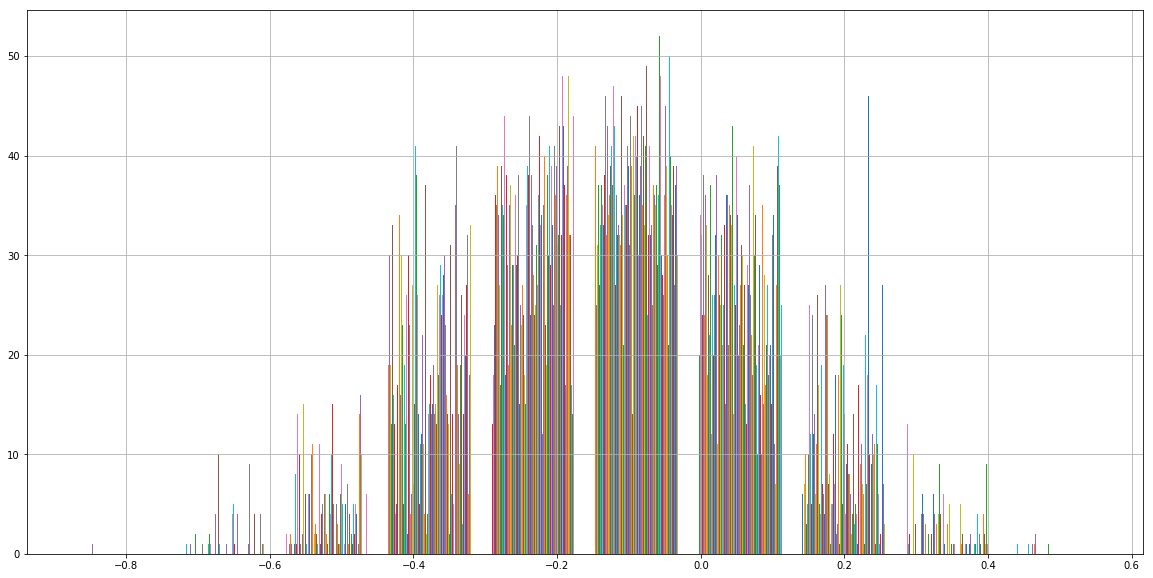

In [25]:
plt.figure(figsize=(20,10))
plt.hist(reader.get_tensor("W1")+reader.get_tensor("b1"))
plt.grid(True)
plt.show()

In [26]:
feed_dict = {X:test_vectors,kprob:1}
pred = sess.run(output_NN,feed_dict)
print (type(pred[0]),pred.shape)

<class 'numpy.ndarray'> (150, 128)


In [27]:
top_10 = [utils.get_top10_closest(pred[_],na_vectores1) for _ in range(pred.shape[0])]
closest = [utils.get_closest_words_to(top_10[_],na) for _ in range(pred.shape[0])]

In [28]:
es[es[0]=="adquisición"].index

Int64Index([2222], dtype='int64')

In [29]:
na[na[0]=="v"].index

Int64Index([1376], dtype='int64')

In [30]:
eval_es[6]

'prestar'

In [31]:
closest[6]

['ehuia',
 'onite',
 'icni',
 'nocupix',
 'diego',
 'cocolo',
 '19',
 'neltoc',
 'rosario',
 'dral']

In [32]:
resultados = {palabra_es:top_10_nah for (palabra_es,top_10_nah) in zip(eval_es,closest)}

In [33]:
esp = list(eval_set["esp"].values)
nah = list(eval_set["nah"].values)
pares_eval = list(zip(esp,nah))

In [34]:
from collections import defaultdict
gold = defaultdict(list)
for palabra_es,palabra_na in pares_eval:
    gold[palabra_es].append(palabra_na)
gold = dict(gold)

In [35]:
gold["amado"]

['tlazo', 'tlazohtla']

In [36]:
resultados["amado"]

['tlazohtla',
 'ama',
 'zquia',
 'ticcua',
 'tazohta',
 'tlazo',
 'diego',
 'comal',
 'federal',
 'niz']

In [37]:
p1 = 0
p5 = 0
p10 = 0
list_esp_eval = (list(resultados.keys()))
hits=list()

not_found = list()

for palabra_gold in list_esp_eval:
    for i in gold[palabra_gold]:
        if i in resultados[palabra_gold]:
            hits.append(resultados[palabra_gold].index(i))
    if hits.__len__() > 0:
        if min(hits) == 0:
            p1 += 1
            p5 += 1
            p10 += 1
        if min(hits) >= 1 and min(hits) <= 5:
            p5 += 1
            p10 += 1
        if min(hits) > 5 and min(hits) <= 10:
            p10 += 1
        print(palabra_gold,min(hits),hits,p1,p5,p10)
    else:
        not_found.append(palabra_gold)
        print(palabra_gold+": NOT FOUND")
   
    hits.clear()

length=list_esp_eval.__len__()
print("\nnot found:", not_found.__len__(), "\nP@1:", p1 / length,
      "\tP@5:", p5 / length, "\tP@10:", p10 / length)
     


saltar 1 [1] 0 1 1
izquierda 0 [0, 2] 1 2 2
reunir 1 [1] 1 3 3
desear 0 [0, 1, 4] 2 4 4
establecer: NOT FOUND
pasar 0 [0] 3 5 5
prestar 0 [0] 4 6 6
brazo: NOT FOUND
vasija 0 [1, 4, 0] 5 7 7
olvidar 4 [4] 5 8 8
nabo 1 [1] 5 9 9
naranja 0 [0] 6 10 10
itacates 0 [0] 7 11 11
despreciar 5 [5] 7 12 12
llanura 0 [0] 8 13 13
ropa 0 [0] 9 14 14
vestido 0 [2, 0] 10 15 15
adquisición: NOT FOUND
presencia 6 [6] 10 15 16
quitar 4 [4] 10 16 17
oír 2 [2] 10 17 18
levantar 0 [0] 11 18 19
tigre 0 [0, 2] 12 19 20
cultura 0 [1, 0] 13 20 21
tema 0 [0] 14 21 22
centenario 0 [0, 5] 15 22 23
tapar 0 [0] 16 23 24
acabar 0 [0] 17 24 25
introducir 0 [1, 0] 18 25 26
patio 0 [1, 0, 2] 19 26 27
ocurrir 2 [2, 3] 19 27 28
pipián 0 [0, 2] 20 28 29
grande 0 [1, 0] 21 29 30
animal 0 [0, 8] 22 30 31
salvaje 0 [0] 23 31 32
efecto: NOT FOUND
unir: NOT FOUND
visceras: NOT FOUND
derecho 1 [1, 3] 23 32 33
puramente: NOT FOUND
vender 0 [1, 0, 3, 2] 24 33 34
adornar 0 [0, 2] 25 34 35
paso 0 [0] 26 35 36
comenzar 0 [0, 1] 27 36

In [38]:
len(list(resultados.keys())),not_found.__len__(),not_found.__len__()/len(list(resultados.keys()))

(150, 17, 0.11333333333333333)

In [39]:
resultados_gold = dict()
for k,v in resultados.items():
    resultados_gold[k] = {"GOLD":gold[k],"RESULTS":v}

# Palabras no encontradas

In [40]:
for res in not_found:
    print(res.upper()+":","\nGOLD",resultados_gold[res]["GOLD"],
          "\nRESULTADOS",resultados_gold[res]["RESULTS"],end="\n"*2)

ESTABLECER: 
GOLD ['tlalia', 'chan'] 
RESULTADOS ['itoa', 'iuh', 'acique', 'cauh', 'pul', 'chic', 'polihui', 'onichantia', 'tepe', 'dral']

BRAZO: 
GOLD ['aca'] 
RESULTADOS ['cuecue', 'milacatzo', 'icemel', 'ahuacatl', 'tonehua', 'huetzi', 'pahpaqui', 'tecuan', 'oquim', 'timamalihuac']

ADQUISICIÓN: 
GOLD ['quipiaz', 'tocococauh', 'cococauh', 'cococa'] 
RESULTADOS ['chiquiuh', 'oticma', 'amech', 'mel', 'ceuh', 'lahtol', 'poyox', 'amaneapan', 'nahua', 'ommihzo']

EFECTO: 
GOLD ['nel'] 
RESULTADOS ['tlaocox', 'oquich', 'ihtotia', 'nehnemi', 'xuchitl', 'ixpetla', 'itoz', 'mixco', 'icnop', 'im']

UNIR: 
GOLD ['cen'] 
RESULTADOS ['f', 'george', 'estado', 'tlahtocayotl', 'do', 'fe', '19', 'cahuan', 'ahuacatl', 'isoldado']

VISCERAS: 
GOLD ['ihti', 'ehua'] 
RESULTADOS ['tlahuicxitilli', 'cuacualaca', 'itzoltilia', 'paca', 'zoqui', 'motlali', 'cuacua', 'caxi', 'tectli', 'tlalia']

PURAMENTE: 
GOLD ['zan', 'za'] 
RESULTADOS ['ommihzo', 'imayauhcan', 'imayauhcampa', 'nepantla', 'ceuh', 'pochcopa

In [41]:
resultados_gold["amado"]

{'GOLD': ['tlazo', 'tlazohtla'],
 'RESULTS': ['tlazohtla',
  'ama',
  'zquia',
  'ticcua',
  'tazohta',
  'tlazo',
  'diego',
  'comal',
  'federal',
  'niz']}

In [42]:
resultados_gold["nido"]

{'GOLD': ['tapazolli', 'tapazol', 'pa', 'zol'],
 'RESULTS': ['nepapan',
  'motemilih',
  'tenanco',
  'mota',
  'diego',
  'xochi',
  'dral',
  'secretario',
  'castillo',
  'rosario']}

# Resultados - Gold

In [43]:
for k,v in resultados_gold.items():
    print("Palabra:",k.upper(),"\nGOLD:",v["GOLD"],"\nRESULTADOS:",
          v["RESULTS"],end="\n"*2)

Palabra: SALTAR 
GOLD: ['ochol', 'chol'] 
RESULTADOS: ['huixoa', 'ochol', 'oquich', 'laxoc', 'tzetzeloa', 'cholo', 'tzatzi', 'im', 'yuhqui', 'ixpetla']

Palabra: IZQUIERDA 
GOLD: ['pochcopa', 'poch', 'opoch'] 
RESULTADOS: ['pochcopa', 'imayauhcampa', 'poch', 'mochantilia', 'acacic', 'dral', 'imayauhcan', 'diego', 'xca', 'mian']

Palabra: REUNIR 
GOLD: ['nechico', 'cen'] 
RESULTADOS: ['potz', 'nechico', 'otitla', 'iuhqui', 'puchteca', 'otito', 'nemoa', 'xipehua', 'yollamachiliz', 'tepahpaquiltia']

Palabra: DESEAR 
GOLD: ['elehui', 'elehuia', 'znequi', 'nequi'] 
RESULTADOS: ['elehui', 'elehuia', 'quechi', 'qu', 'znequi', 'monequilti', 'achto', 'nec', 'xip', 'achtopa']

Palabra: ESTABLECER 
GOLD: ['tlalia', 'chan'] 
RESULTADOS: ['itoa', 'iuh', 'acique', 'cauh', 'pul', 'chic', 'polihui', 'onichantia', 'tepe', 'dral']

Palabra: PASAR 
GOLD: ['pano', 'panoa'] 
RESULTADOS: ['pano', 'saroa', 'amen', 'tlen', 'moch', 'lti', 'omo', 'yb', 'mati', 'im']

Palabra: PRESTAR 
GOLD: ['ehuia'] 
RESULTAD